# TAQ_midpoint_plot

#### Juan Camilo Henao Londono - 06.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In [1]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [2]:
def TAQ_midpoint_plot(ticker, year, month, day):
    """
    Plot the midpoint price data during a open market day. The data is loaded
    from the mipoint price data results. Function to be used in the function
    midpoint_plot_week.
        :param ticker: String of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: String of the year to be analized (i.e '2008')
        :param month: String of the month to be analized (i.e '07')
        :param day: String of the day to be analized (i.e '07')
    """

    # Load data

    print('Processing data for the stock ' + ticker + ' the day ' + year
          + '.' + month + '.' + day)

    midpoint = pickle.load(open(
        '../TAQ_Data_{0}/TAQ_midpoint_data/midpoint_{0}{1}{2}_{3}.pickl'.format(year, month, day, ticker),
        'rb'))
    time = pickle.load(open('../TAQ_Data_{}/TAQ_midpoint_data/time.pickl'.format(year), 'rb'))

    # Plotting

    plt.plot(time, midpoint, label=('Day {}'.format(day)))
    plt.legend(loc=0, fontsize=20)

    return None

In [3]:
def TAQ_midpoint_plot_week(ticker, year, month, days):
    """
    Plot the midpoint price data during a time period. The data is loaded from
    the mipoint price data results. The time period must be previously knowed
    and set to the function.
        :param ticker: String of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: String of the year to be analized (i.e '2008')
        :param month: String of the month to be analized (i.e '07')
        :param days: String with the days to be analized
         (i.e ['07', '08', '09'])
    """

    plt.figure(figsize=(16, 9))

    for day in days:
        TAQ_midpoint_plot(ticker, year, month, day)

    plt.title('{}'.format(ticker), fontsize=40)
    plt.xlabel(r'Time $[hour]$', fontsize=25)
    plt.ylabel(r'Price $ [\$] $', fontsize=25)
    plt.tight_layout()
    plt.grid(True)

    if (not os.path.isdir('../TAQ_Plots_{}/TAQ_midpoint_plot/'.format(year))):

        os.mkdir('../TAQ_Plots_{}/TAQ_midpoint_plot/'.format(year))
        print('Folder to save plot created')

    plt.savefig('../TAQ_Plots_{0}/TAQ_midpoint_plot/midpoint_plot_week_{0}{1}_{2}-{3}_{4}.png'
                .format(year, month, days[0], days[-1], ticker))

    return None

In [4]:
def TAQ_ask_bid_midpoint_spread_plot(ticker, year, month, day):
    
    ask = pickle.load(open('../TAQ_Data_{0}/TAQ_midpoint_data/ask_{0}{1}{2}_{3}.pickl'
                          .format(year, month, day, ticker), 'rb'))
    bid = pickle.load(open('../TAQ_Data_{0}/TAQ_midpoint_data/bid_{0}{1}{2}_{3}.pickl'
                          .format(year, month, day, ticker), 'rb'))
    midpoint = pickle.load(open('../TAQ_Data_{0}/TAQ_midpoint_data/midpoint_{0}{1}{2}_{3}.pickl'
                          .format(year, month, day, ticker), 'rb'))
    spread = pickle.load(open('../TAQ_Data_{0}/TAQ_midpoint_data/spread_{0}{1}{2}_{3}.pickl'
                          .format(year, month, day, ticker), 'rb'))
    time = pickle.load(open('../TAQ_Data_{}/TAQ_midpoint_data/time.pickl'
                          .format(year), 'rb'))
    
    
    fig = plt.figure(figsize=(9,16))
    fig.suptitle('{} - {}.{}.{}'.format(ticker, year, month, day), fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95, wspace=0.3)
    
    plt.subplot(4, 2, 1)
    plt.plot(time, midpoint, label='Midpoint')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    #plt.tight_layout()

    plt.subplot(4, 2, 2)
    plt.plot(time, spread, label='Spread')
    plt.xlabel('Time')
    plt.ylabel('Spread')
    plt.legend(loc='best')
    plt.grid(True)
    #plt.tight_layout()

    plt.subplot(4, 2, 3)
    plt.plot(time, bid, label='Bid quotes')
    plt.plot(time, ask, label='Ask quotes')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    #plt.tight_layout()

    plt.subplot(4, 2, 4)
    plt.scatter(time, ask, label='Ask trades')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    #plt.tight_layout()
    
    if (not os.path.isdir('../TAQ_Plots_{}/TAQ_midpoint_plot/'.format(year))):

        os.mkdir('../TAQ_Plots_{}/TAQ_midpoint_plot/'.format(year))
        print('Folder to save plot created')

    plt.savefig('../TAQ_Plots_{0}/TAQ_midpoint_plot/TAQ_ask_bid_midpoint_spread_plot_{0}{1}{2}_{3}.png'
                .format(year, month, days, ticker))
    
    return None

Processing data for the stock AAPL the day 2008.03.10
Processing data for the stock AAPL the day 2008.03.11
Processing data for the stock AAPL the day 2008.03.12
Processing data for the stock AAPL the day 2008.03.13
Processing data for the stock AAPL the day 2008.03.14
Folder to save plot created


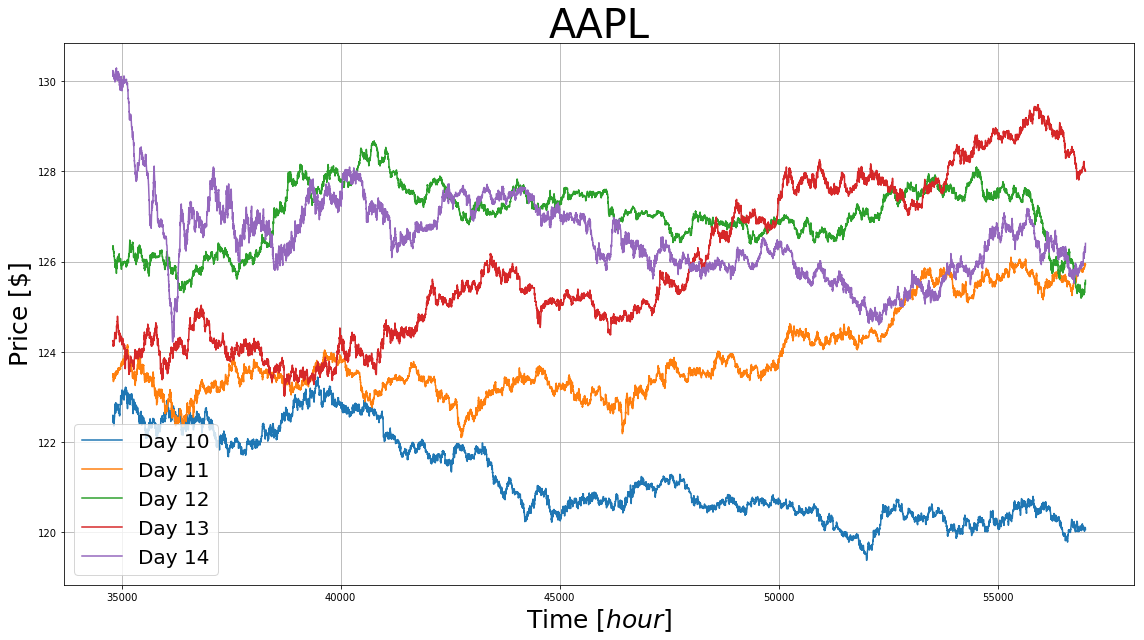

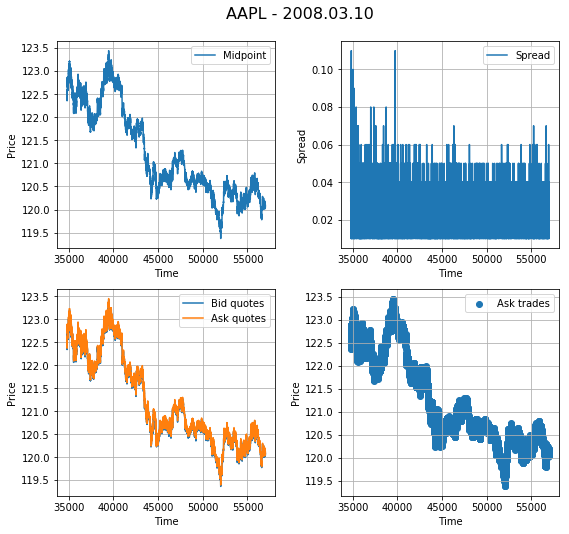

In [5]:
tickers = ['AAPL', 'MSFT']
year = '2008'
month = '03'
days = ['10', '11', '12', '13', '14']

TAQ_midpoint_plot_week('AAPL', year, month, days)
TAQ_ask_bid_midpoint_spread_plot('AAPL', year, month, '10')